# EDA

### Importing Libraries

In [44]:
import pandas as pd
import re
from nltk.corpus import stopwords
from collections import Counter
from statistics import median
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Importing dataset

In [45]:
data = pd.read_csv('ed_sheeran.csv',header=None,names=['Title','Link','Lyrics'])

#Removing rows which have empty lyrics
data = data[data['Lyrics'].notna()].reset_index(drop=True)

#Removing Duplicate rows and unneccessary columns
data = pd.DataFrame(data['Lyrics'].unique(),columns=['Lyrics'])

data.head(5)

,Lyrics
0,"Hey, hey, hey, hey, Hey, hey, hey, hey, Hey, ..."
1,The club isn't the best place to find a lover...
2,"I found a love for me, Darling, just dive rig..."
3,"Loving can hurt, Loving can hurt sometimes, B..."
4,When your legs don't work like they used to b...


In [46]:
#Songs in the dataset
len(data)

109

In [47]:
#Creating list of all songs
songs_list = list(data['Lyrics'].apply(str))

### Median length of each song (in characters)

In [48]:
song_length = round(median([len(songs_list[x]) for x in range(len(songs_list))])/100)*100
song_length

1500

### Median length of each song (in words)

In [49]:
song_length = round(median([len(songs_list[x].split()) for x in range(len(songs_list))])/100)*100
song_length

300

In [50]:
#Combined list of words in all songs
words = ' '.join([i for i in data['Lyrics']]).split()
print(words)

['Hey,', 'hey,', 'hey,', 'hey,', 'Hey,', 'hey,', 'hey,', 'hey,', 'Hey,', 'hey,', 'hey,', 'hey', 'Simmer', 'down,', 'simmer', 'down,', 'They', 'say', "we're", 'too', 'young', 'now', 'to', 'amount', 'to', 'anything', 'else,', 'But', 'look', 'around,', 'We', 'work', 'too', 'damn', 'hard', 'for', 'this', 'just', 'to', 'give', 'it', 'up', 'now,', 'If', 'you', "don't", 'swim,', "you'll", 'drown,', 'But', "don't", 'move,', 'honey,', 'You', 'look', 'so', 'perfect', 'standing', 'there,', 'In', 'my', 'American', 'Apparel', 'underwear,', 'And', 'I', 'know', 'now,', 'that', "I'm", 'so', 'down,', 'Your', 'lipstick', 'stain', 'is', 'a', 'work', 'of', 'art,', 'I', 'got', 'your', 'name', 'tattooed', 'in', 'an', 'arrow', 'heart', 'And', 'I', 'know', 'now,', 'that', "I'm", 'so', 'down', '(whoa)', 'Hey,', 'hey!,', 'Hey,', 'hey,', 'hey,', 'hey', 'Hey,', 'hey,', 'Hey,', 'hey', "Let's", 'get', 'out,', "let's", 'get', "out',", 'Cause', 'this', 'deadbeat', "town's", 'only', 'here', 'just', 'to', 'keep', 'us',

### Removing special characters

In [51]:
for i in range(0,len(words)):
    words[i] = re.sub(r'[^\w\s]','',words[i])

In [52]:
print(words)

['Hey', 'hey', 'hey', 'hey', 'Hey', 'hey', 'hey', 'hey', 'Hey', 'hey', 'hey', 'hey', 'Simmer', 'down', 'simmer', 'down', 'They', 'say', 'were', 'too', 'young', 'now', 'to', 'amount', 'to', 'anything', 'else', 'But', 'look', 'around', 'We', 'work', 'too', 'damn', 'hard', 'for', 'this', 'just', 'to', 'give', 'it', 'up', 'now', 'If', 'you', 'dont', 'swim', 'youll', 'drown', 'But', 'dont', 'move', 'honey', 'You', 'look', 'so', 'perfect', 'standing', 'there', 'In', 'my', 'American', 'Apparel', 'underwear', 'And', 'I', 'know', 'now', 'that', 'Im', 'so', 'down', 'Your', 'lipstick', 'stain', 'is', 'a', 'work', 'of', 'art', 'I', 'got', 'your', 'name', 'tattooed', 'in', 'an', 'arrow', 'heart', 'And', 'I', 'know', 'now', 'that', 'Im', 'so', 'down', 'whoa', 'Hey', 'hey', 'Hey', 'hey', 'hey', 'hey', 'Hey', 'hey', 'Hey', 'hey', 'Lets', 'get', 'out', 'lets', 'get', 'out', 'Cause', 'this', 'deadbeat', 'towns', 'only', 'here', 'just', 'to', 'keep', 'us', 'down', 'While', 'I', 'was', 'out', 'I', 'found'

### Removing stopwords

In [53]:
stop = set(stopwords.words('english'))

#convert all words to lowercase
words = [word.lower() for word in words]

#remove stopwords
words = [i for i in words if i not in stop]

#Remove empty words
words = [x for x in words if x]

In [54]:
print(words)

['hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'simmer', 'simmer', 'say', 'young', 'amount', 'anything', 'else', 'look', 'around', 'work', 'damn', 'hard', 'give', 'dont', 'swim', 'youll', 'drown', 'dont', 'move', 'honey', 'look', 'perfect', 'standing', 'american', 'apparel', 'underwear', 'know', 'im', 'lipstick', 'stain', 'work', 'art', 'got', 'name', 'tattooed', 'arrow', 'heart', 'know', 'im', 'whoa', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'lets', 'get', 'lets', 'get', 'cause', 'deadbeat', 'towns', 'keep', 'us', 'found', 'alone', 'thinking', 'showed', 'plane', 'ticket', 'shiny', 'diamond', 'ring', 'name', 'would', 'wanna', 'run', 'away', 'cause', 'really', 'want', 'look', 'perfect', 'standing', 'american', 'apparel', 'underwear', 'know', 'im', 'lipstick', 'stain', 'work', 'art', 'got', 'name', 'tattooed', 'arrow', 'heart', 'know', 'im', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey

In [55]:
#Unique words
len(set(words))

2935

### Most common words used by Ed-Sheeran

In [56]:
#Top words used in songs
labels, values = zip(*Counter(words).items())
w = Counter(words)
s = w.most_common(20)
s

[('love', 468),
 ('im', 376),
 ('dont', 280),
 ('know', 270),
 ('oh', 262),
 ('like', 227),
 ('ill', 207),
 ('need', 180),
 ('youre', 178),
 ('never', 163),
 ('see', 131),
 ('come', 130),
 ('cause', 125),
 ('go', 121),
 ('tell', 120),
 ('baby', 117),
 ('take', 112),
 ('one', 112),
 ('let', 112),
 ('ive', 112)]

### Wordcloud

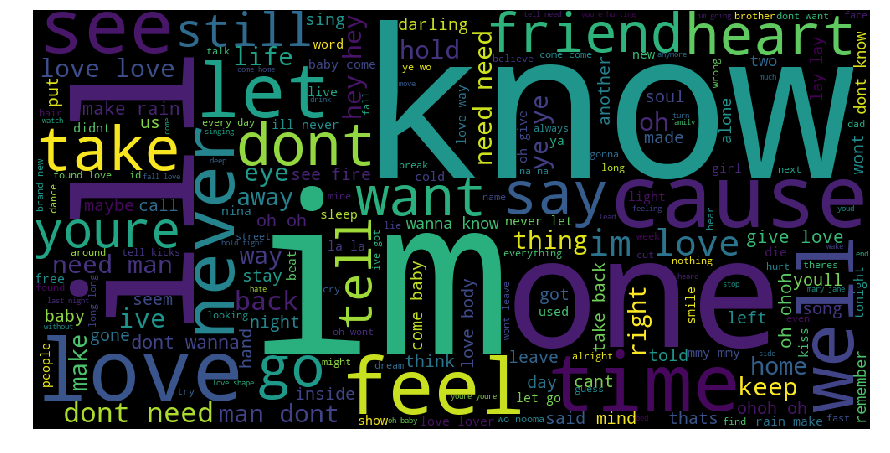

In [57]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()